In [21]:
import pandas as pd
import numpy as np
import time
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
plt.style.use('ggplot')
import keys

In [2]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
auth.set_access_token(keys.access_token, keys.access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
def followers_id_to_csv(screen_name, page=20):
    followers_id = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).pages(page):
        followers_id.extend(page)
    df = pd.DataFrame(followers_id, columns=['follower_ID'])
    df.to_csv(f'data/{screen_name}_followers_id.csv', index = False)

In [92]:
# screen_names = ['realDonaldTrump','VP', 'UnfollowTrump','senatemajldr','JoeBiden','SenKamalaHarris','SpeakerPelosi']
# for name in screen_names:
#     followers_id_to_csv(name)

In [7]:
# load lists of follower IDs to DF
realDonaldTrump_followers_id = pd.read_csv('data/realDonaldTrump_followers_id.csv')
UnfollowTrump_followers_id = pd.read_csv('data/UnfollowTrump_followers_id.csv')
VP_followers_id = pd.read_csv('data/VP_followers_id.csv')
senatemajldr_followers_id = pd.read_csv('data/senatemajldr_followers_id.csv')
JoeBiden_followers_id = pd.read_csv('data/JoeBiden_followers_id.csv')
SenKamalaHarris_followers_id = pd.read_csv('data/SenKamalaHarris_followers_id.csv')
SpeakerPelosi_followers_id = pd.read_csv('data/SpeakerPelosi_followers_id.csv')

In [9]:
def follower_user_df_to_pickle(follower_ids,screen_name):
    followers_user_objects = []
    for i in range(0, len(follower_ids), 100):
        followers_user_objects.extend(api.lookup_users(follower_ids[i:i+100]))
    df = pd.DataFrame(followers_user_objects, columns=['user'])
    df.to_pickle(f'data/user_object/{screen_name}_followers_user.pkl')

In [4]:
# save user objects df to pickle 

# follower_user_df_to_pickle(list(realDonaldTrump_followers_id.follower_ID),'realDonaldTrump')
# follower_user_df_to_pickle(list(UnfollowTrump_followers_id.follower_ID),'UnfollowTrump')
# follower_user_df_to_pickle(list(VP_followers_id.follower_ID),'VP')
# follower_user_df_to_pickle(list(senatemajldr_followers_id.follower_ID),'senatemajldr')
# follower_user_df_to_pickle(list(JoeBiden_followers_id.follower_ID),'JoeBiden')
# follower_user_df_to_pickle(list(SenKamalaHarris_followers_id.follower_ID),'SenKamalaHarris')
# follower_user_df_to_pickle(list(SpeakerPelosi_followers_id.follower_ID),'SpeakerPelosi')

Read user objects from pickle into dataframe

In [123]:
# realDonaldTrump_followers_user = pd.read_pickle('data/user_object/realDonaldTrump_followers_user.pkl')
# UnfollowTrump_followers_user = pd.read_pickle('data/user_object/UnfollowTrump_followers_user.pkl')
# VP_followers_user = pd.read_pickle('data/user_object/VP_followers_user.pkl')
senatemajldr_followers_user = pd.read_pickle('data/user_object/senatemajldr_followers_user.pkl')
JoeBiden_followers_user = pd.read_pickle('data/user_object/JoeBiden_followers_user.pkl')
SenKamalaHarris_followers_user = pd.read_pickle('data/user_object/SenKamalaHarris_followers_user.pkl')
SpeakerPelosi_followers_user = pd.read_pickle('data/user_object/SpeakerPelosi_followers_user.pkl')

In [125]:
def follower_info_df(df_original, screen_name):
    df = df_original.copy()
    df['created_at'] = df['user'].apply(lambda x : x.created_at)
    df['id'] = df['user'].apply(lambda x : x.id)
    df['followers_count'] = df['user'].apply(lambda x : x.followers_count)
    df['friends_count'] = df['user'].apply(lambda x : x.friends_count)
    df['statuses_count'] = df['user'].apply(lambda x : x.statuses_count)
    df['favourites_count'] = df['user'].apply(lambda x : x.favourites_count)
    df.pop('user')
    df.to_csv(f'data/follower_info/{screen_name}_follower_info.csv',index = False)
    return df

In [126]:
# realDonaldTrump_followers_info = follower_info_df(realDonaldTrump_followers_user, 'realDonaldTrump')
# UnfollowTrump_followers_info = follower_info_df(UnfollowTrump_followers_user, 'UnfollowTrump')
# VP_followers_info = follower_info_df(VP_followers_user, 'VP')
# senatemajldr_followers_info = follower_info_df(senatemajldr_followers_user,'senatemajldr')
# JoeBiden_followers_info = follower_info_df(JoeBiden_followers_user, 'JoeBiden')
# SenKamalaHarris_followers_info = follower_info_df(SenKamalaHarris_followers_user,'SenKamalaHarris')
# SpeakerPelosi_followers_info = follower_info_df(SpeakerPelosi_followers_user,'SpeakerPelosi')

In [ ]:
realDonaldTrump_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('realDonaldTrump'))
UnfollowTrump_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('UnfollowTrump'))
VP_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('VP'))
senatemajldr_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('senatemajldr'))
JoeBiden_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('JoeBiden'))
SenKamalaHarris_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('SenKamalaHarris'))
SpeakerPelosi_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('SpeakerPelosi'))

In [38]:
# def get_first_digit_of_counts(df_original):
#     df = df_original.copy()
#     df['first_digit_followers_count'] = df['followers_count'].apply(lambda x : int(str(x)[0]))
#     df['first_digit_friends_count'] = df['friends_count'].apply(lambda x : int(str(x)[0]))
#     df['first_digit_statuses_count'] = df['statuses_count'].apply(lambda x : int(str(x)[0]))
#     df['first_digit_favourites_count'] = df['favourites_count'].apply(lambda x : int(str(x)[0]))
#     return df

In [32]:
def first_digit_counts(data, ignore_1=True):
    # get only non-zero values
    if ignore_1:
        data = data[data > 1]
    else:
        data = data[data > 0]
    first_digits = list(map(lambda x: int(str(x)[0]), data))
    
    empirical_counts = np.zeros(9)
    digit = []
    for i in range(1, 10):
        empirical_counts[i - 1] = first_digits.count(i)
        digit.append(i)

    # Total amount
    total_count=sum(empirical_counts)
    # Make percentage
    empirical_percentage=[(i / total_count) * 100 for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_percentage, total_count, digit)

In [20]:
benford_leading_digits = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [119]:
def chisquare_test_plot(empirical_data, dist_percentage, ax, alpha=0.05, title='', ignore_1 = False):
    empirical_counts, empirical_percentage, total_count, digit = first_digit_counts(empirical_data, ignore_1 = ignore_1)
    expected_counts = [round(percent/100*total_count) for percent in dist_percentage]
    tstats, Praw = chisquare(empirical_counts, f_exp=expected_counts)
    
    rects1 = ax.bar(digit, empirical_percentage, alpha=0.8, label="Empirical Distribution",color='black', width=.5)
    ax.plot(digit, empirical_percentage, color='black', linewidth=0.8)
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)
    ax.scatter(digit, dist_percentage, s=100, c='red', zorder=2, label='Benfords distribution')
    
    if Praw <= alpha:
        title = title + f"\nAnomaly detected! P={Praw:.2f}, Tstat={tstats:.2f}" 
    else:
        title = title + f"\nNo anomaly detected. P={Praw:.2f}, Tstat={tstats:.2f}"
    empirical_percentage_round = [round(n, 2) for n in empirical_percentage]
    diff = [round(a-b, 2) for a, b in zip(dist_percentage, empirical_percentage)]
    title = title + f"\nEmpirical % :{empirical_percentage_round}" + f"\nDifference % :{diff}" 
        
    ax.set_title(title)
    ax.set_ylabel('Frequency (%)')
    ax.set_xlabel('Digits')
    ax.set_xticks(digit)
    ax.set_xticklabels(digit)
    ax.legend()

In [120]:
def four_plot_for_user(df, scree_name, figsize=(20, 15), ignore_1=False):
    fig, ax = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f'{scree_name}\'s Follower\'s', fontsize=16)
    chisquare_test_plot(df.followers_count, benford_leading_digits, title='Follower Counts', ax = ax[0,0], ignore_1=ignore_1)
    chisquare_test_plot(df.friends_count, benford_leading_digits, title= 'Friend Counts', ax = ax[0,1], ignore_1=ignore_1)
    chisquare_test_plot(df.statuses_count, benford_leading_digits, title= 'Statuses Counts', ax = ax[1,0], ignore_1=ignore_1)
    chisquare_test_plot(df.favourites_count, benford_leading_digits, title= 'Favourites Counts', ax = ax[1,1], ignore_1=ignore_1)
    plt.tight_layout()

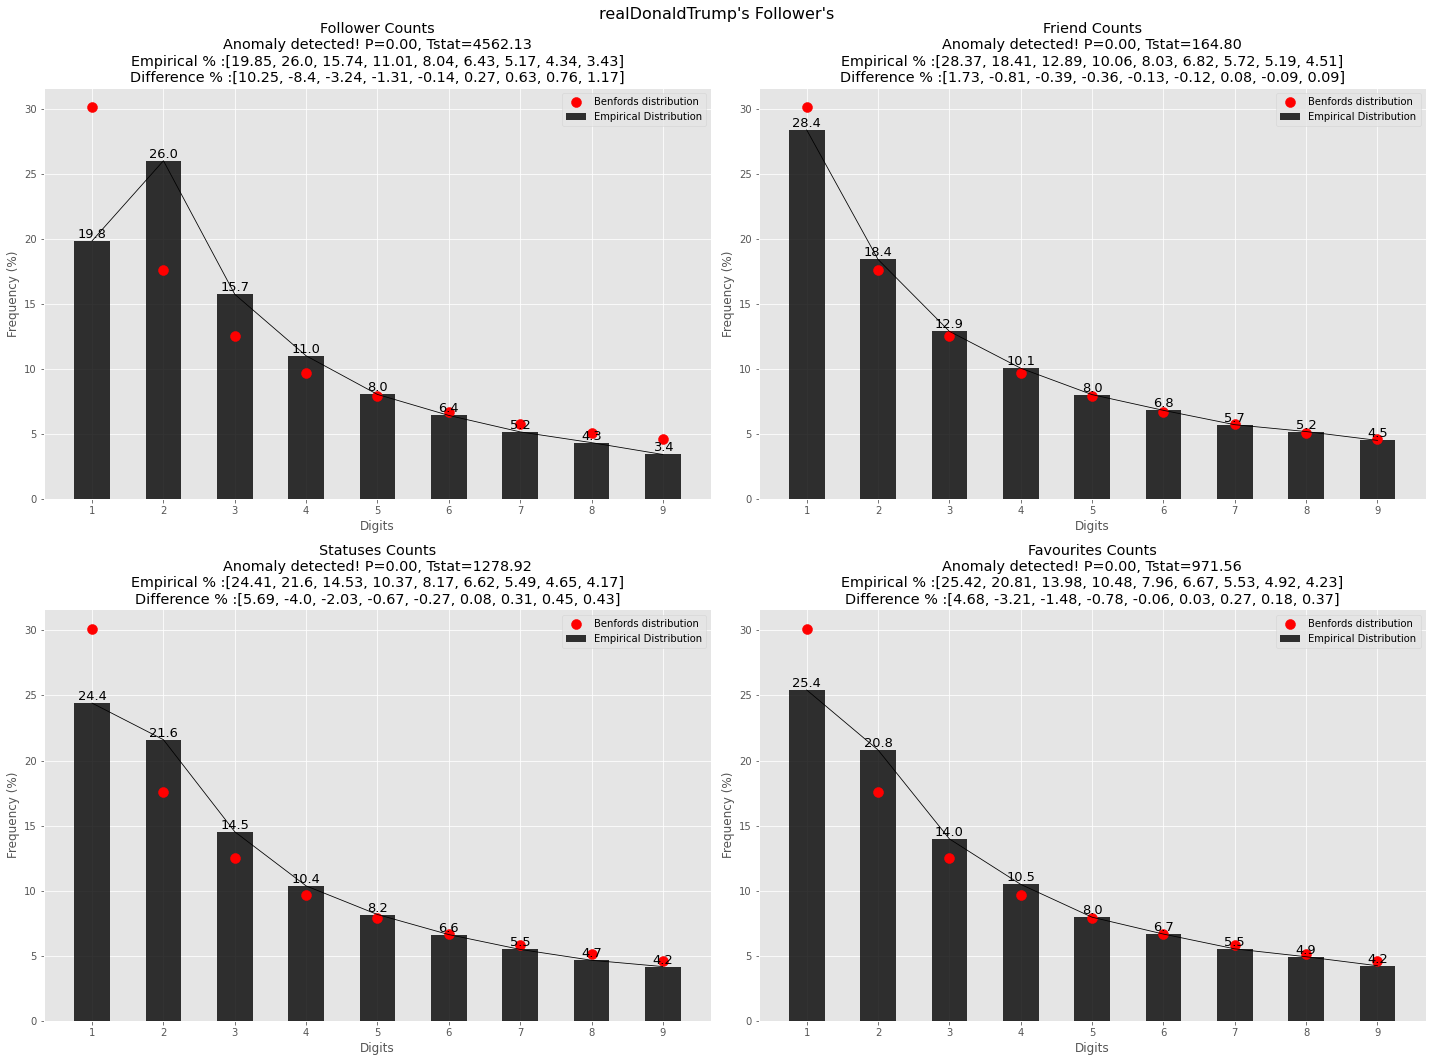

In [121]:
four_plot_for_user(realDonaldTrump_followers_info, 'realDonaldTrump', ignore_1=True)

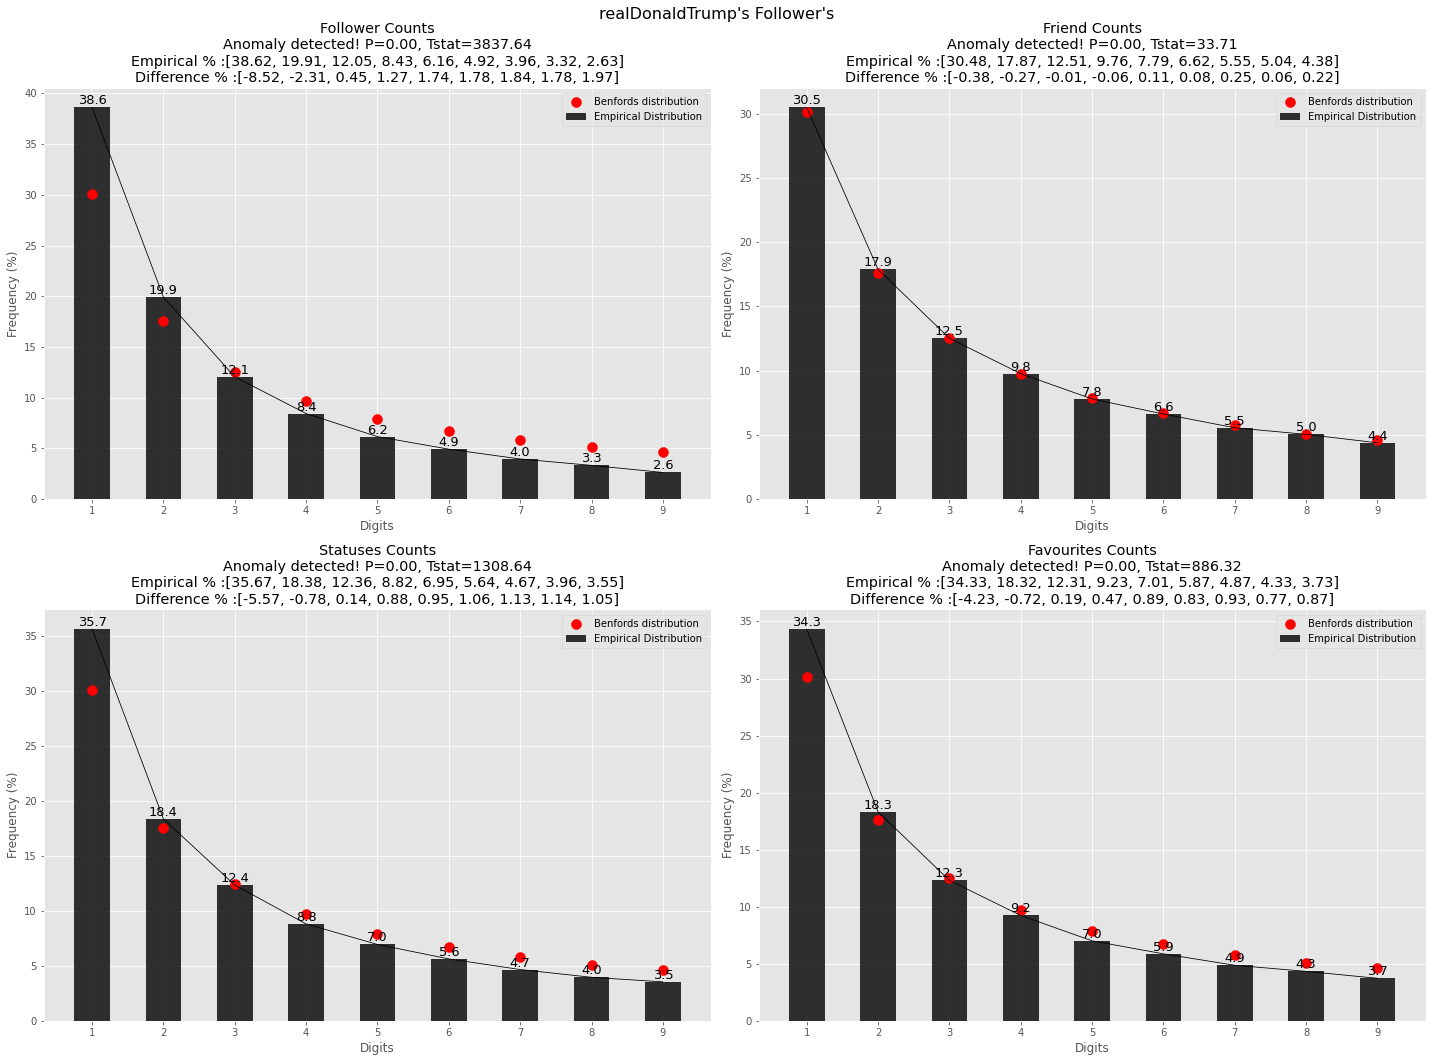

In [122]:
four_plot_for_user(realDonaldTrump_followers_info, 'realDonaldTrump', ignore_1=False)

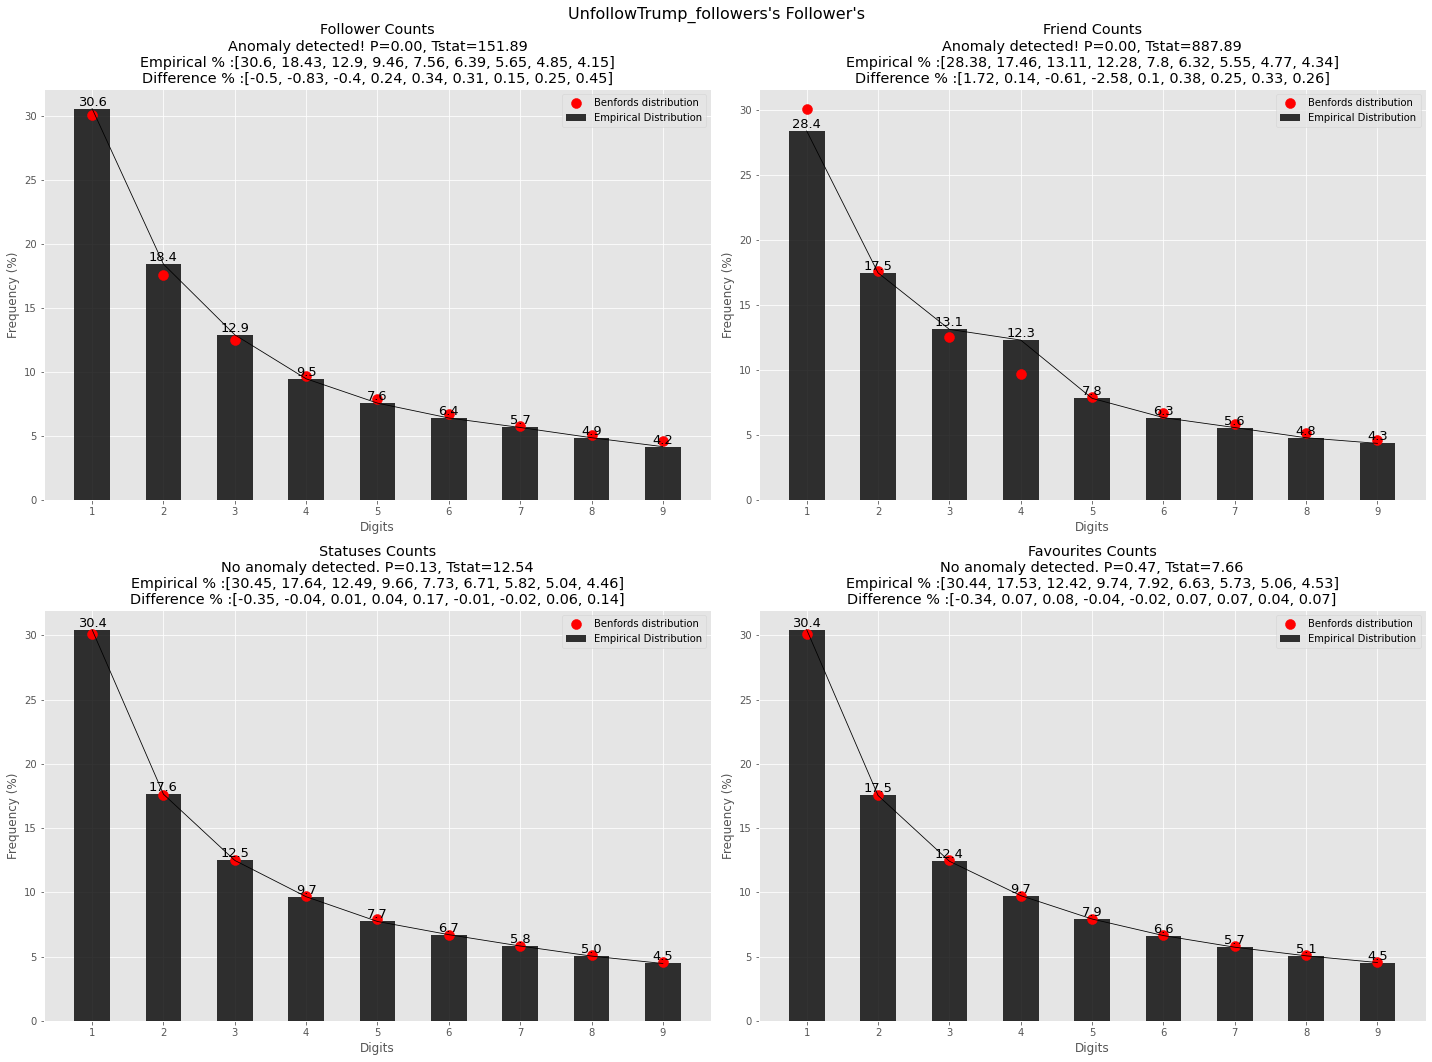

In [127]:
four_plot_for_user(UnfollowTrump_followers_info, 'UnfollowTrump_followers', ignore_1=False)

In [ ]:
from benfordslaw import benfordslaw
bl = benfordslaw(alpha=0.05)

<ipython-input-129-9f1f70b2c198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digits[digits == 1] = 10


[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3837.64


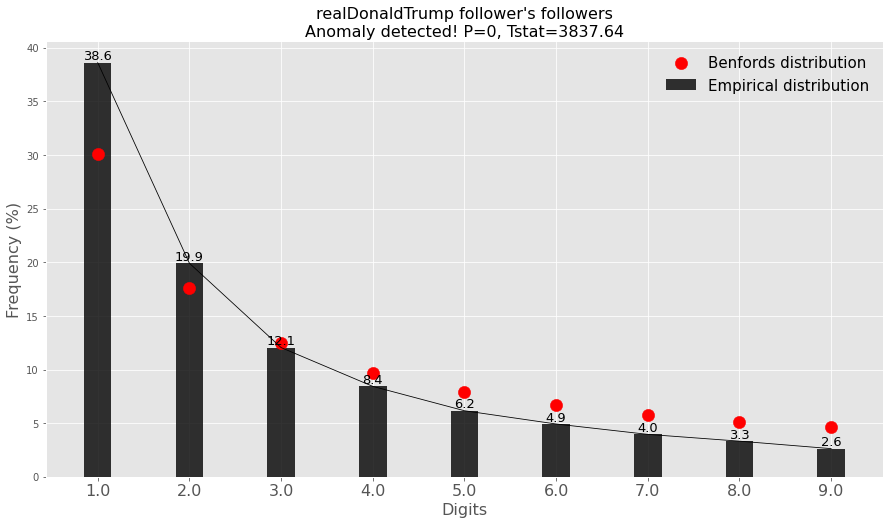

In [129]:
digits = realDonaldTrump_first_digit.follower_count
digits[digits == 1] = 10
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=4562.13


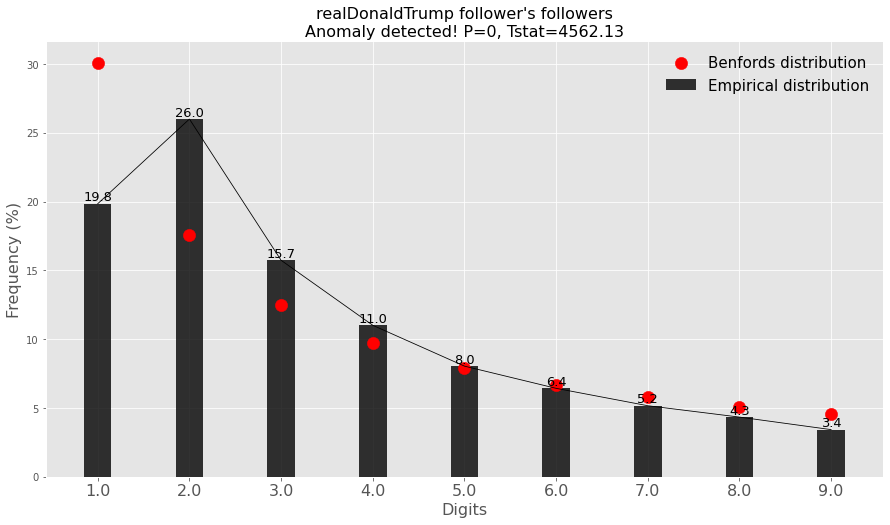

In [120]:
digits = realDonaldTrump_first_digit.follower_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=1.5842e-31, Tstat=164.799


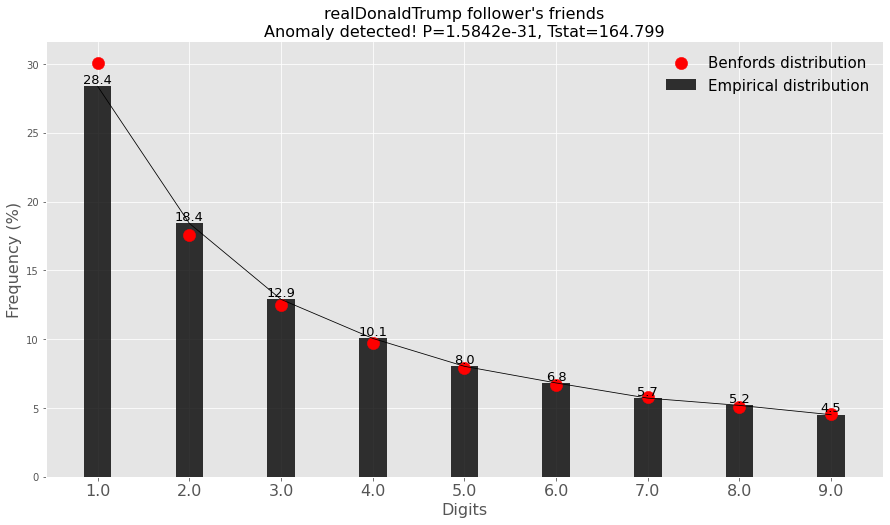

In [119]:
digits = realDonaldTrump_first_digit.friends_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s friends');

[benfordslaw] >[chi2] Anomaly detected! P=8.47397e-271, Tstat=1278.92


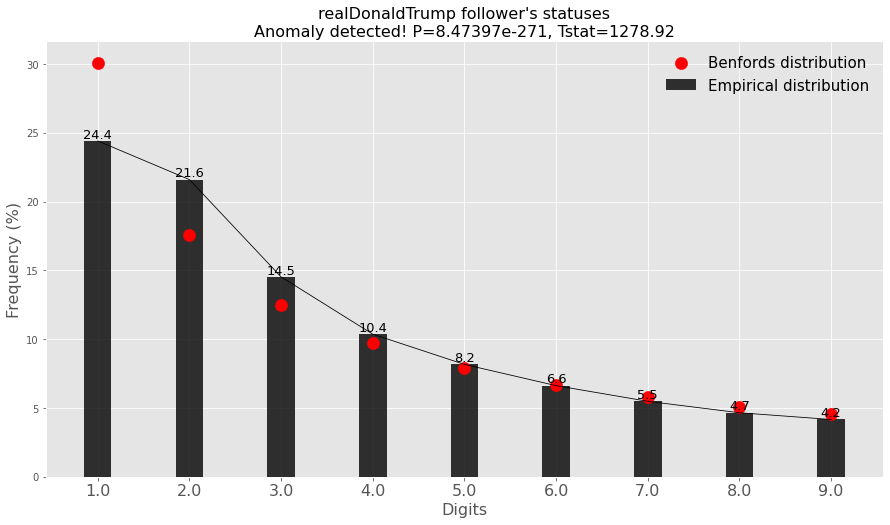

In [118]:
digits = realDonaldTrump_first_digit.statuses_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s statuses');

[benfordslaw] >[chi2] Anomaly detected! P=2.05065e-204, Tstat=971.562


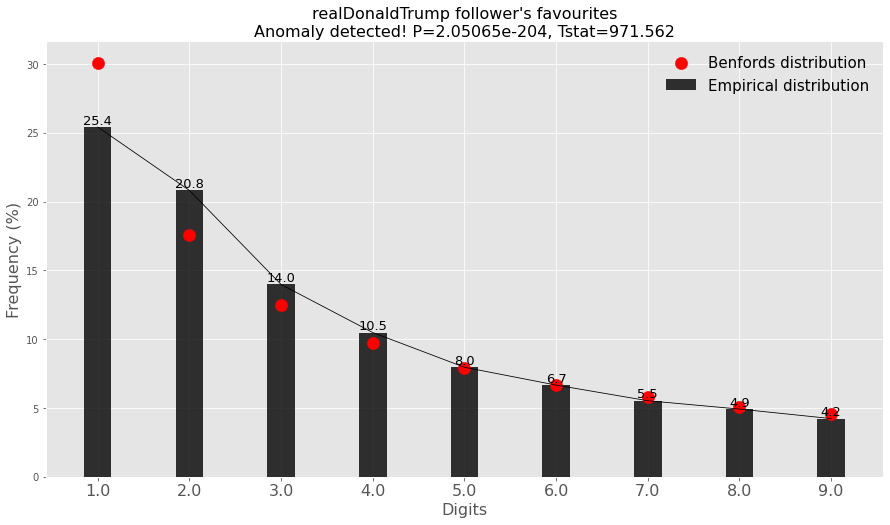

In [121]:
digits = realDonaldTrump_first_digit.favourites_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s favourites');

[benfordslaw] >[chi2] Anomaly detected! P=1.35321e-33, Tstat=174.67


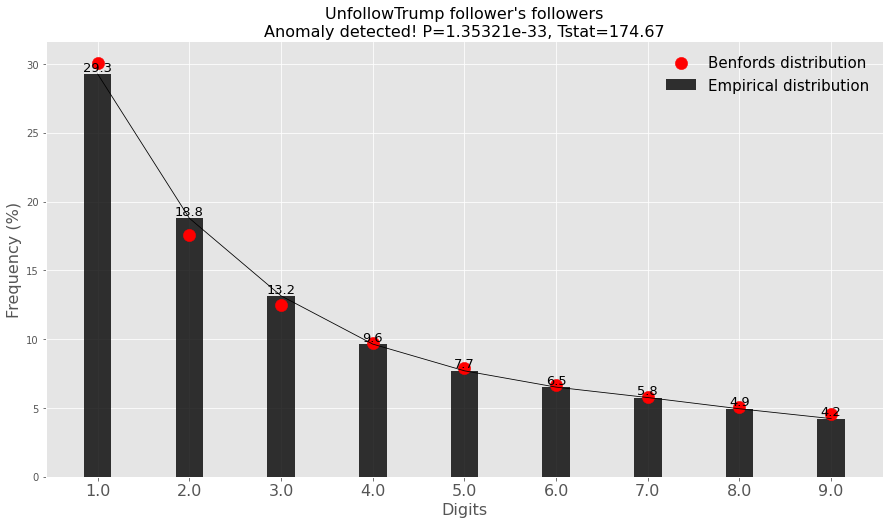

In [126]:
digits = UnfollowTrump_followers_user_info.follower_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=4.77925e-188, Tstat=895.7


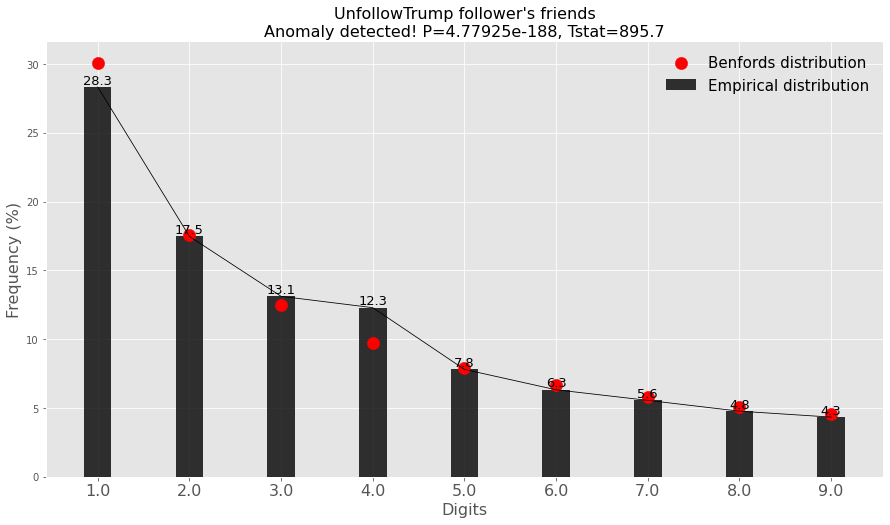

In [128]:
digits = UnfollowTrump_followers_user_info.friends_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s friends');

[benfordslaw] >[chi2] No anomaly detected. P=0.909435, Tstat=3.36467


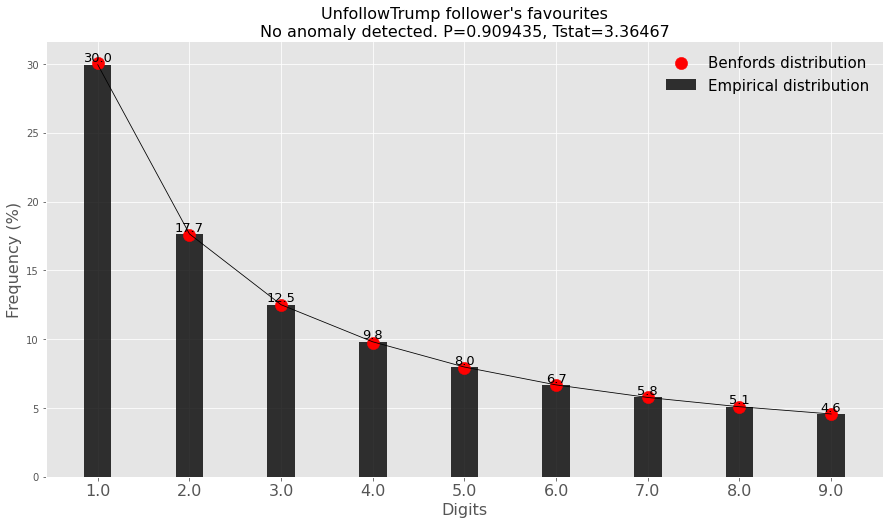

In [124]:
digits = UnfollowTrump_followers_user_info.favourites_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s favourites');